In [ ]:
#pip install catboost

In [72]:
pip install lightgbm

In [75]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [76]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
sns.set()
import pylab
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from IPython.display import Image
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import f1_score as f1
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

In [11]:
df=pd.read_csv("E:\\datasets\\Loan Prediction on costumer Behavior\\Training Data.csv")

In [12]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,single,rented,no,Surgeon,Kolkata,West_Bengal,6,11,0
251996,251997,2843572,26,10,single,rented,no,Army_officer,Rewa,Madhya_Pradesh,6,11,0
251997,251998,4522448,46,7,single,rented,no,Design_Engineer,Kalyan-Dombivli,Maharashtra,7,12,0
251998,251999,6507128,45,0,single,rented,no,Graphic_Designer,Pondicherry,Puducherry,0,10,0


In [13]:
df.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [15]:
df=df.drop(columns=['Id','CITY','STATE'])

In [16]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,3,14,1
...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,single,rented,no,Surgeon,6,11,0
251996,2843572,26,10,single,rented,no,Army_officer,6,11,0
251997,4522448,46,7,single,rented,no,Design_Engineer,7,12,0
251998,6507128,45,0,single,rented,no,Graphic_Designer,0,10,0


In [18]:
df['Married/Single']=df['Married/Single'].replace({'single':0,'married':1})

In [21]:
df['House_Ownership'].value_counts()

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64

In [23]:
df['House_Ownership']=df['House_Ownership'].replace({'rented':0,'owned':1,'norent_noown':2})

In [27]:
df['Car_Ownership'].value_counts()

no     176000
yes     76000
Name: Car_Ownership, dtype: int64

In [28]:
df['Car_Ownership']=df['Car_Ownership'].replace({'no':0,'yes':1})

In [30]:
df=pd.get_dummies(df,columns=['Profession'])

In [31]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_Air_traffic_controller,...,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer
0,1303834,23,3,0,0,0,3,13,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7574516,40,10,0,0,0,9,13,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3991815,66,4,1,0,0,4,10,0,0,...,0,0,0,0,0,0,1,0,0,0
3,6256451,41,2,0,0,1,2,12,1,0,...,0,0,1,0,0,0,0,0,0,0
4,5768871,47,11,0,0,0,3,14,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,0,0,6,11,0,0,...,0,0,0,0,1,0,0,0,0,0
251996,2843572,26,10,0,0,0,6,11,0,0,...,0,0,0,0,0,0,0,0,0,0
251997,4522448,46,7,0,0,0,7,12,0,0,...,0,0,0,0,0,0,0,0,0,0
251998,6507128,45,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,0


## Applying AdaBooting Classifier

In [32]:
X=df.drop(columns='Risk_Flag')
Y=df['Risk_Flag']

In [35]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 221004, 1: 30996})
Resample dataset shape Counter({0: 221004, 1: 221004})


In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))


Original dataset shape Counter({0: 221004, 1: 30996})
Resample dataset shape Counter({0: 221004, 1: 221004})


In [37]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=34)

In [45]:
lm=AdaBoostClassifier()
lm.fit(x_train,y_train)

AdaBoostClassifier()

In [47]:
y_pred=lm.predict(x_test)

In [48]:
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
accuracy_score(y_test,y_pred)

0.5949526028822877

In [50]:
confusion_matrix(y_test,y_pred)

array([[25415, 18661],
       [17146, 27180]], dtype=int64)

In [51]:
f1(y_test,y_pred,average='weighted')

0.5948139553441459

In [52]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [53]:
auc = roc_auc_score(y_test,y_pred)
auc

0.5949008980632269

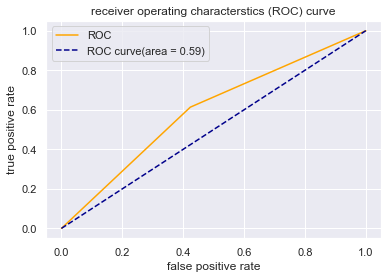

In [54]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying Gradient Boosting Classifier

In [55]:
X=df.drop(columns='Risk_Flag')
Y=df['Risk_Flag']

In [56]:
from imblearn.over_sampling import RandomOverSampler

rus = RandomOverSampler(random_state=42)
x_rus, y_rus = rus.fit_resample(X, Y)


print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_rus))

Original dataset shape Counter({0: 221004, 1: 30996})
Resample dataset shape Counter({0: 221004, 1: 221004})


In [57]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Counter(Y))
print('Resample dataset shape', Counter(y_smote))


Original dataset shape Counter({0: 221004, 1: 30996})
Resample dataset shape Counter({0: 221004, 1: 221004})


In [58]:
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.20,random_state=34)

In [61]:
lm=GradientBoostingClassifier()
lm.fit(x_train,y_train)

GradientBoostingClassifier()

In [63]:
y_pred=lm.predict(x_test)

In [64]:
y_pred

array([0, 1, 1, ..., 0, 1, 1], dtype=int64)

In [65]:
accuracy_score(y_test,y_pred)

0.6449967195312323

In [66]:
confusion_matrix(y_test,y_pred)

array([[26341, 17735],
       [13648, 30678]], dtype=int64)

In [67]:
f1(y_test,y_pred,average='weighted')

0.6441895796618687

In [68]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [69]:
auc = roc_auc_score(y_test,y_pred)
auc

0.6448631357058802

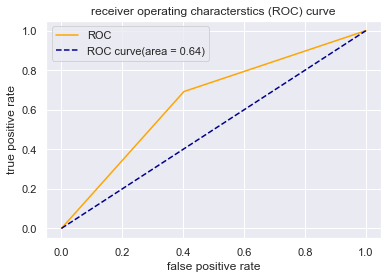

In [70]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying XG Boosting Classifier

In [77]:
lm=XGBClassifier()
lm.fit(x_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [78]:
y_pred=lm.predict(x_test)

In [79]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [80]:
accuracy_score(y_test,y_pred)

0.891665346937852

In [81]:
confusion_matrix(y_test,y_pred)

array([[37100,  6976],
       [ 2601, 41725]], dtype=int64)

In [82]:
f1(y_test,y_pred,average='weighted')

0.8913840769651502

In [83]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [84]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8915245226404765

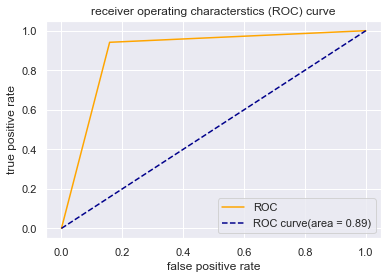

In [85]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying Cat Boosting Classifier

In [86]:
lm=CatBoostClassifier()
lm.fit(x_train,y_train)

Learning rate set to 0.126227
0:	learn: 0.6889456	total: 498ms	remaining: 8m 17s
1:	learn: 0.6857342	total: 862ms	remaining: 7m 10s
2:	learn: 0.6827887	total: 1.03s	remaining: 5m 42s
3:	learn: 0.6802808	total: 1.22s	remaining: 5m 3s
4:	learn: 0.6773715	total: 1.45s	remaining: 4m 48s
5:	learn: 0.6747202	total: 1.79s	remaining: 4m 56s
6:	learn: 0.6723292	total: 1.98s	remaining: 4m 41s
7:	learn: 0.6702309	total: 2.18s	remaining: 4m 30s
8:	learn: 0.6679469	total: 2.54s	remaining: 4m 39s
9:	learn: 0.6661372	total: 2.86s	remaining: 4m 43s
10:	learn: 0.6649891	total: 3.07s	remaining: 4m 36s
11:	learn: 0.6636342	total: 3.26s	remaining: 4m 28s
12:	learn: 0.6622118	total: 3.79s	remaining: 4m 47s
13:	learn: 0.6607244	total: 4.06s	remaining: 4m 46s
14:	learn: 0.6592656	total: 4.25s	remaining: 4m 39s
15:	learn: 0.6574716	total: 4.45s	remaining: 4m 33s
16:	learn: 0.6560638	total: 4.94s	remaining: 4m 45s
17:	learn: 0.6548742	total: 5.25s	remaining: 4m 46s
18:	learn: 0.6534643	total: 5.4s	remaining: 4

In [87]:
y_pred=lm.predict(x_test)

In [88]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [89]:
accuracy_score(y_test,y_pred)

0.929379425804846

In [90]:
confusion_matrix(y_test,y_pred)

array([[39297,  4779],
       [ 1464, 42862]], dtype=int64)

In [91]:
f1(y_test,y_pred,average='weighted')

0.9292724570380997

In [92]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [93]:
auc = roc_auc_score(y_test,y_pred)
auc

0.9292728129244726

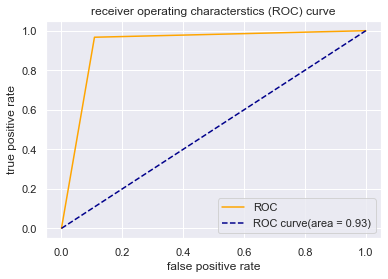

In [94]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()

## Applying Light Boosting Classifier

In [95]:
lm=LGBMClassifier()
lm.fit(x_train,y_train)

LGBMClassifier()

In [96]:
y_pred=lm.predict(x_test)

In [97]:
y_pred

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [98]:
accuracy_score(y_test,y_pred)

0.8121988190312437

In [99]:
confusion_matrix(y_test,y_pred)

array([[33839, 10237],
       [ 6365, 37961]], dtype=int64)

In [100]:
f1(y_test,y_pred,average='weighted')

0.8118144373091437

In [101]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

In [102]:
auc = roc_auc_score(y_test,y_pred)
auc

0.8120734503504111

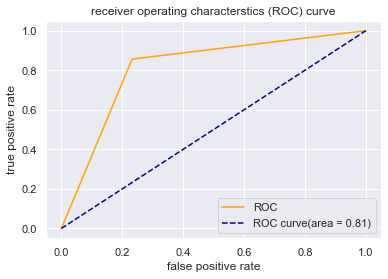

In [103]:
plt.plot(fpr , tpr , color='orange',label='ROC')
plt.plot([0,1],[0,1],color = 'darkblue',linestyle='--',label='ROC curve(area = %0.2f)'% auc)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('receiver operating characterstics (ROC) curve')
plt.legend()
plt.show()